In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import plotly.express as px
import os


In [21]:
# Create output directory for saved visualizations if it doesn't exist
output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
print(f"Output directory created/verified: {output_dir}")

Output directory created/verified: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data


In [22]:
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak_mapped.csv')
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\DOE_mapped.csv')

In [23]:
# Rename 'State' column to 'statecode' in compstak_df for consistent analysis
compstak_df = compstak_df.rename(columns={'State': 'statecode'})

# Verify column names in both dataframes
print("ComptStak DF columns:", compstak_df.columns.tolist())
print("DOE DF columns:", doe_df.columns.tolist())

ComptStak DF columns: ['Property Type', 'Property Subtype', 'Property Id', 'statecode', 'DOE_Compliant_Property_Type']
DOE DF columns: ['statecode', 'reported_propertytype', 'reported_propertysubtype', 'compstak_equivalent_category']


In [24]:
compstak_df

,Property Type,Property Subtype,Property Id,statecode,DOE_Compliant_Property_Type
0,Retail,Parking,1,NY,Other
1,Retail,Apartments,2,NY,Multi-Family
2,Office,NaN,3,NY,Office
3,Retail,NaN,4,NY,Retail
4,Office,Mixed-Use,5,NY,Other
...,...,...,...,...,...
759618,NaN,NaN,3611385,NY,Other
759619,Industrial,Flex/R&D,3611389,FL,Industrial
759620,Industrial,Flex/R&D,3611390,FL,Industrial
759621,NaN,NaN,3611391,CA,Other


In [25]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


# Comparing CompStak and DOE Datasets: Property Types and States Analysis

We'll analyze and compare the distribution of properties in CompStak and DOE datasets across two dimensions:
1. Property Types (DOE_Compliant_Property_Type vs. compstak_equivalent_category)
2. States (statecode)

This will help us understand how the CompStak dataset (subset) compares to the DOE dataset (full dataset).

In [26]:
# 1. Analysis by Property Type Category

# Get property type counts for both datasets
compstak_property_counts = compstak_df['DOE_Compliant_Property_Type'].value_counts().reset_index()
compstak_property_counts.columns = ['Property_Type', 'CompStak_Count']

doe_property_counts = doe_df['compstak_equivalent_category'].value_counts().reset_index()
doe_property_counts.columns = ['Property_Type', 'DOE_Count']

# Merge the counts for comparison
property_comparison = pd.merge(compstak_property_counts, doe_property_counts, on='Property_Type', how='outer').fillna(0)

# Calculate percentages
property_comparison['CompStak_Percentage'] = property_comparison['CompStak_Count'] / property_comparison['CompStak_Count'].sum() * 100
property_comparison['DOE_Percentage'] = property_comparison['DOE_Count'] / property_comparison['DOE_Count'].sum() * 100

# Sort by DOE count (largest to smallest)
property_comparison = property_comparison.sort_values('DOE_Count', ascending=False)

print("Property Type Distribution Comparison:")
print(property_comparison)

Property Type Distribution Comparison:
  Property_Type  CompStak_Count  DOE_Count  CompStak_Percentage  \
5        Retail          195522     931077            25.739347   
1    Industrial          183106     438534            24.104852   
3        Office           88768     388432            11.685797   
2  Multi-Family          114427     253361            15.063657   
4         Other          167732     161804            22.080953   
0         Hotel           10068      73277             1.325394   

   DOE_Percentage  
5       41.445948  
1       19.520896  
3       17.290656  
2       11.278108  
4        7.202541  
0        3.261851  


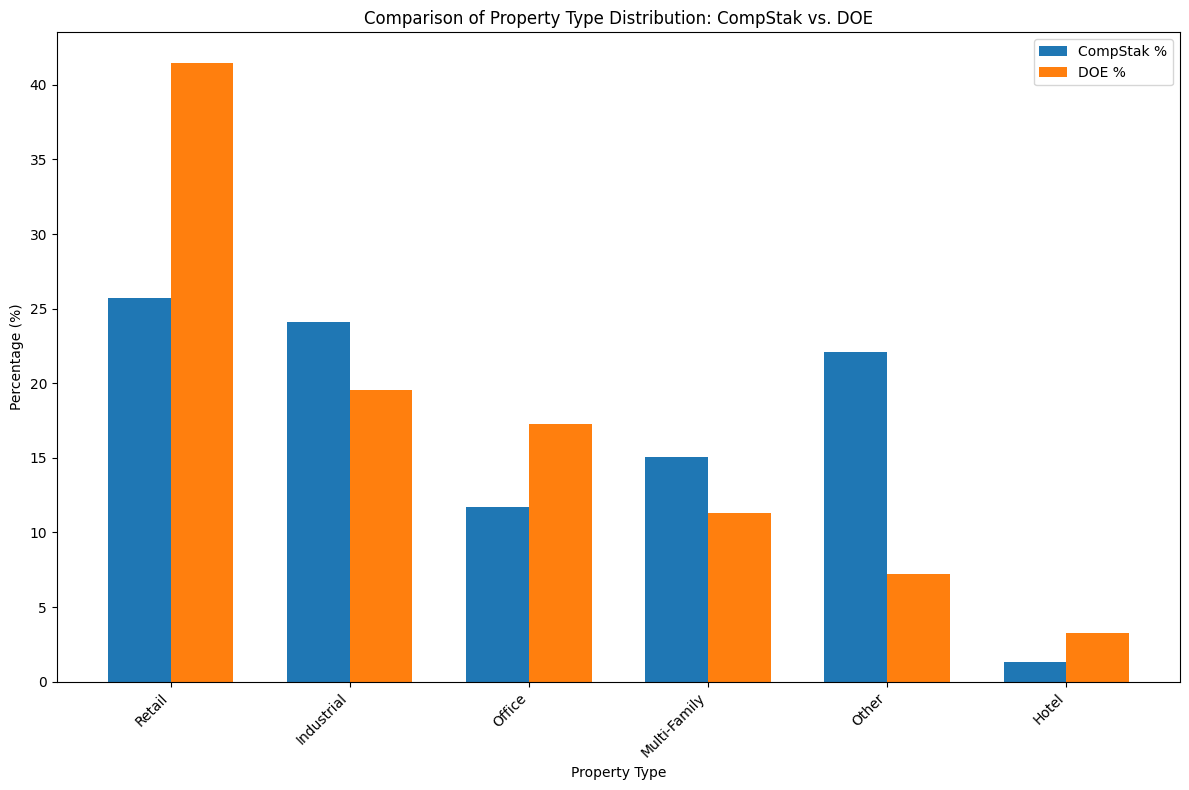

In [27]:
# Visualize property type comparison with a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(property_comparison))
width = 0.35

ax.bar(x - width/2, property_comparison['CompStak_Percentage'], width, label='CompStak %')
ax.bar(x + width/2, property_comparison['DOE_Percentage'], width, label='DOE %')

ax.set_xlabel('Property Type')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Property Type Distribution: CompStak vs. DOE')
ax.set_xticks(x)
ax.set_xticklabels(property_comparison['Property_Type'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'property_type_comparison.png'))
plt.show()

In [28]:
# 2. Analysis by State (statecode)

# Get state counts for both datasets
compstak_state_counts = compstak_df['statecode'].value_counts().reset_index()
compstak_state_counts.columns = ['State', 'CompStak_Count']

doe_state_counts = doe_df['statecode'].value_counts().reset_index()
doe_state_counts.columns = ['State', 'DOE_Count']

# Merge the counts for comparison
state_comparison = pd.merge(compstak_state_counts, doe_state_counts, on='State', how='outer').fillna(0)

# Calculate percentages
state_comparison['CompStak_Percentage'] = state_comparison['CompStak_Count'] / state_comparison['CompStak_Count'].sum() * 100
state_comparison['DOE_Percentage'] = state_comparison['DOE_Count'] / state_comparison['DOE_Count'].sum() * 100

# Sort by DOE count (largest to smallest)
state_comparison = state_comparison.sort_values('DOE_Count', ascending=False)

# Show top 20 states for better readability
top_states = state_comparison.head(20)
print("Top 20 States by DOE Count:")
print(top_states)

Top 20 States by DOE Count:
   State  CompStak_Count  DOE_Count  CompStak_Percentage  DOE_Percentage
4     CA          162162     238844            21.347695       10.631898
43    TX           64220     157912             8.454194        7.029292
9     FL           54836     145821             7.218844        6.491074
34    NY           43118     113724             5.676237        5.062308
35    OH           19159     109843             2.522172        4.889550
38    PA           21876      90276             2.879850        4.018545
14    IL           31389      83364             4.132181        3.710864
27    NC           27085      79107             3.565585        3.521368
22    MI           15952      76260             2.099989        3.394637
10    GA           25218      74036             3.319805        3.295637
31    NJ           22802      66598             3.001752        2.964542
19    MA           16907      61761             2.225709        2.749228
15    IN           1002

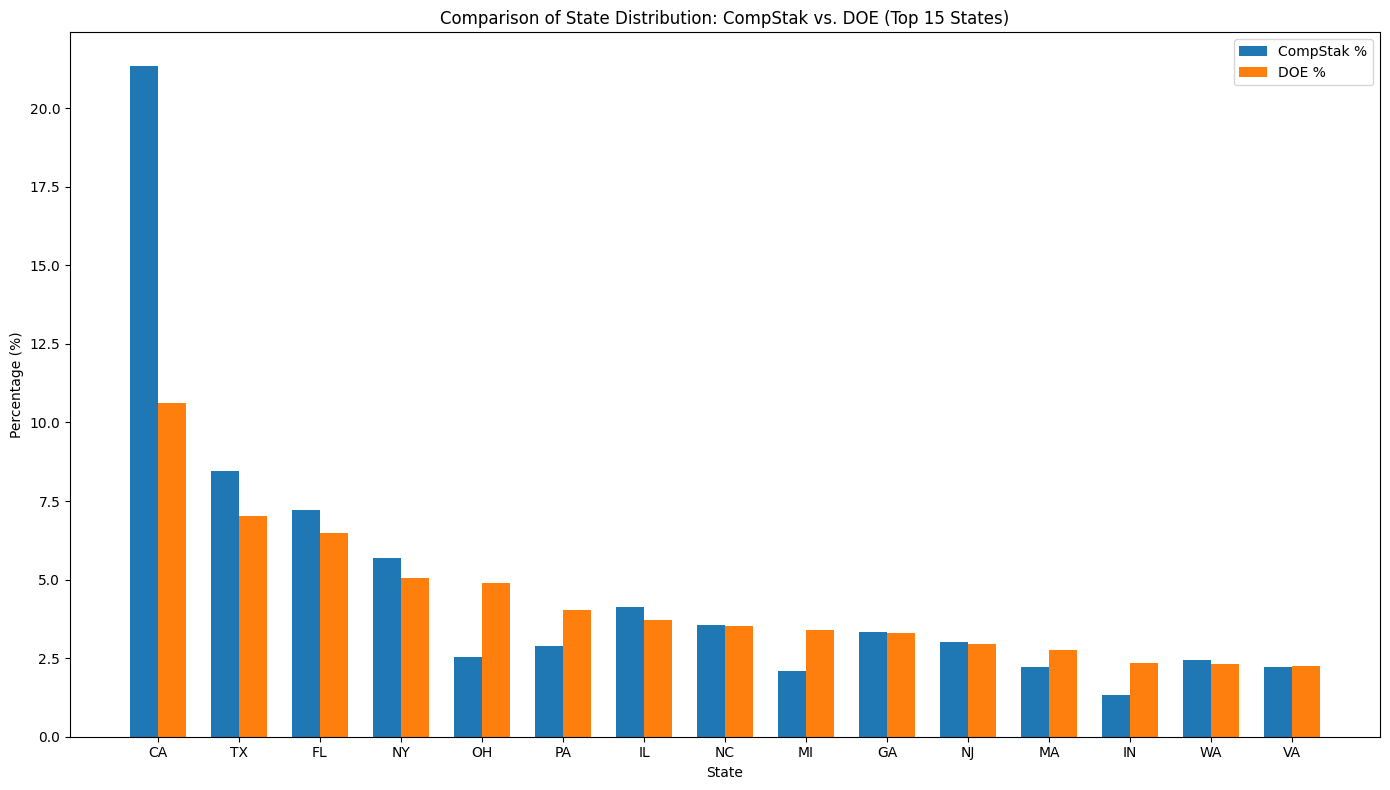

In [29]:
# Visualize state comparison with a grouped bar chart (top 15 states for clarity)
top_n = 15
top_states = state_comparison.head(top_n)

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(top_states))
width = 0.35

ax.bar(x - width/2, top_states['CompStak_Percentage'], width, label='CompStak %')
ax.bar(x + width/2, top_states['DOE_Percentage'], width, label='DOE %')

ax.set_xlabel('State')
ax.set_ylabel('Percentage (%)')
ax.set_title(f'Comparison of State Distribution: CompStak vs. DOE (Top {top_n} States)')
ax.set_xticks(x)
ax.set_xticklabels(top_states['State'])
ax.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'state_distribution_comparison.png'))
plt.show()

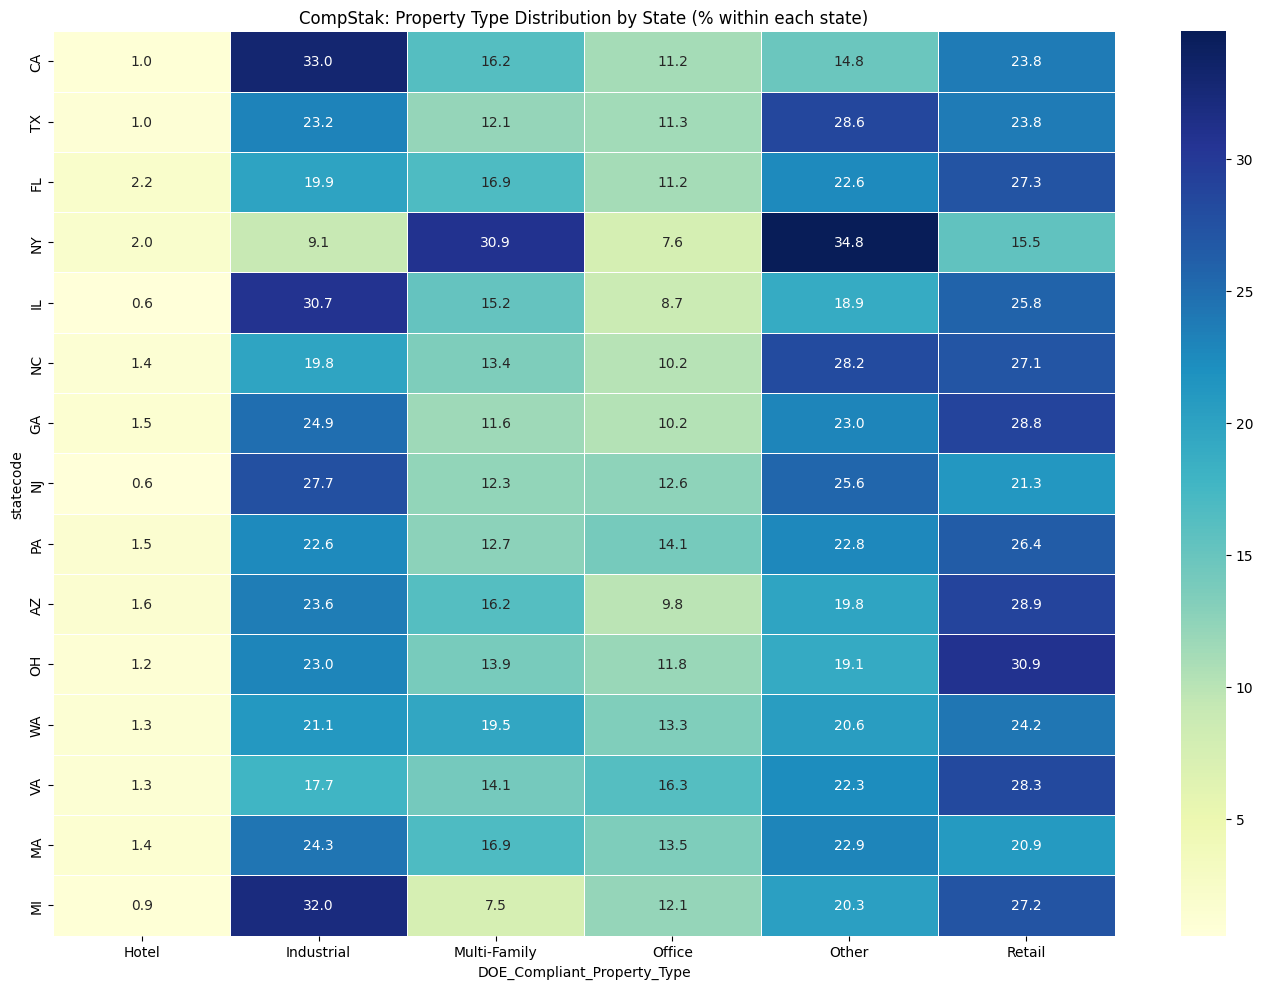

In [30]:
# 3. Combined analysis: State and Property Type (Heatmap for CompStak)

# Create a cross-tabulation of state and property type for CompStak
compstak_cross = pd.crosstab(compstak_df['statecode'], compstak_df['DOE_Compliant_Property_Type'])

# Convert to percentages (row-wise)
compstak_cross_pct = compstak_cross.div(compstak_cross.sum(axis=1), axis=0) * 100

# Take top 15 states by total count for readability
top_states_list = compstak_state_counts['State'].head(15).tolist()
compstak_cross_pct_top = compstak_cross_pct.loc[top_states_list]

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(compstak_cross_pct_top, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('CompStak: Property Type Distribution by State (% within each state)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'compstak_state_property_heatmap.png'))
plt.show()

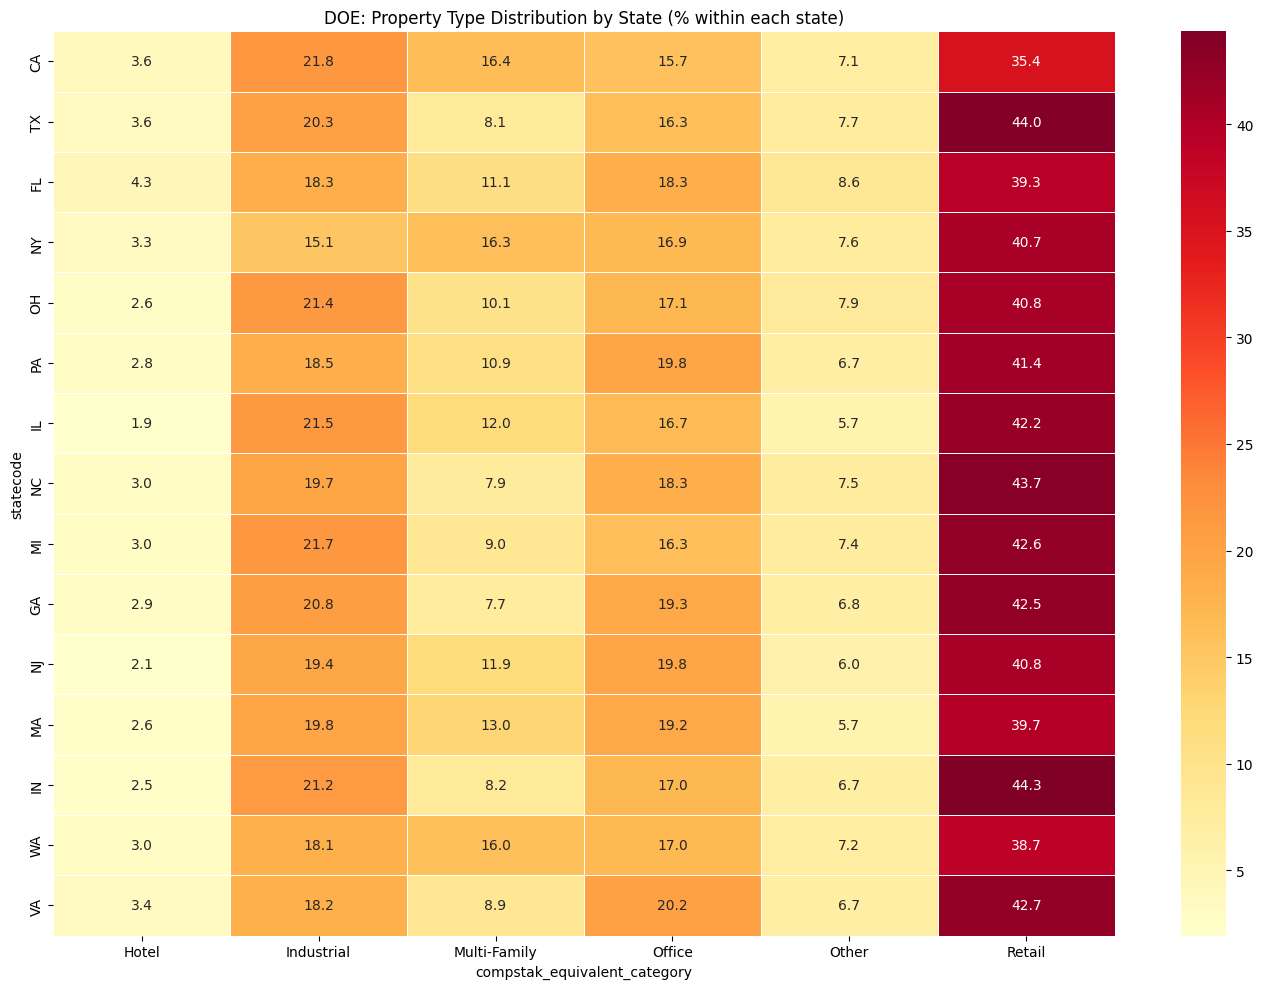

In [31]:
# Heatmap for DOE data

# Create a cross-tabulation of state and property type for DOE
doe_cross = pd.crosstab(doe_df['statecode'], doe_df['compstak_equivalent_category'])

# Convert to percentages (row-wise)
doe_cross_pct = doe_cross.div(doe_cross.sum(axis=1), axis=0) * 100

# Take top 15 states by total count for readability
top_states_doe = doe_state_counts['State'].head(15).tolist()
doe_cross_pct_top = doe_cross_pct.loc[top_states_doe]

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(doe_cross_pct_top, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)
plt.title('DOE: Property Type Distribution by State (% within each state)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'doe_state_property_heatmap.png'))
plt.show()

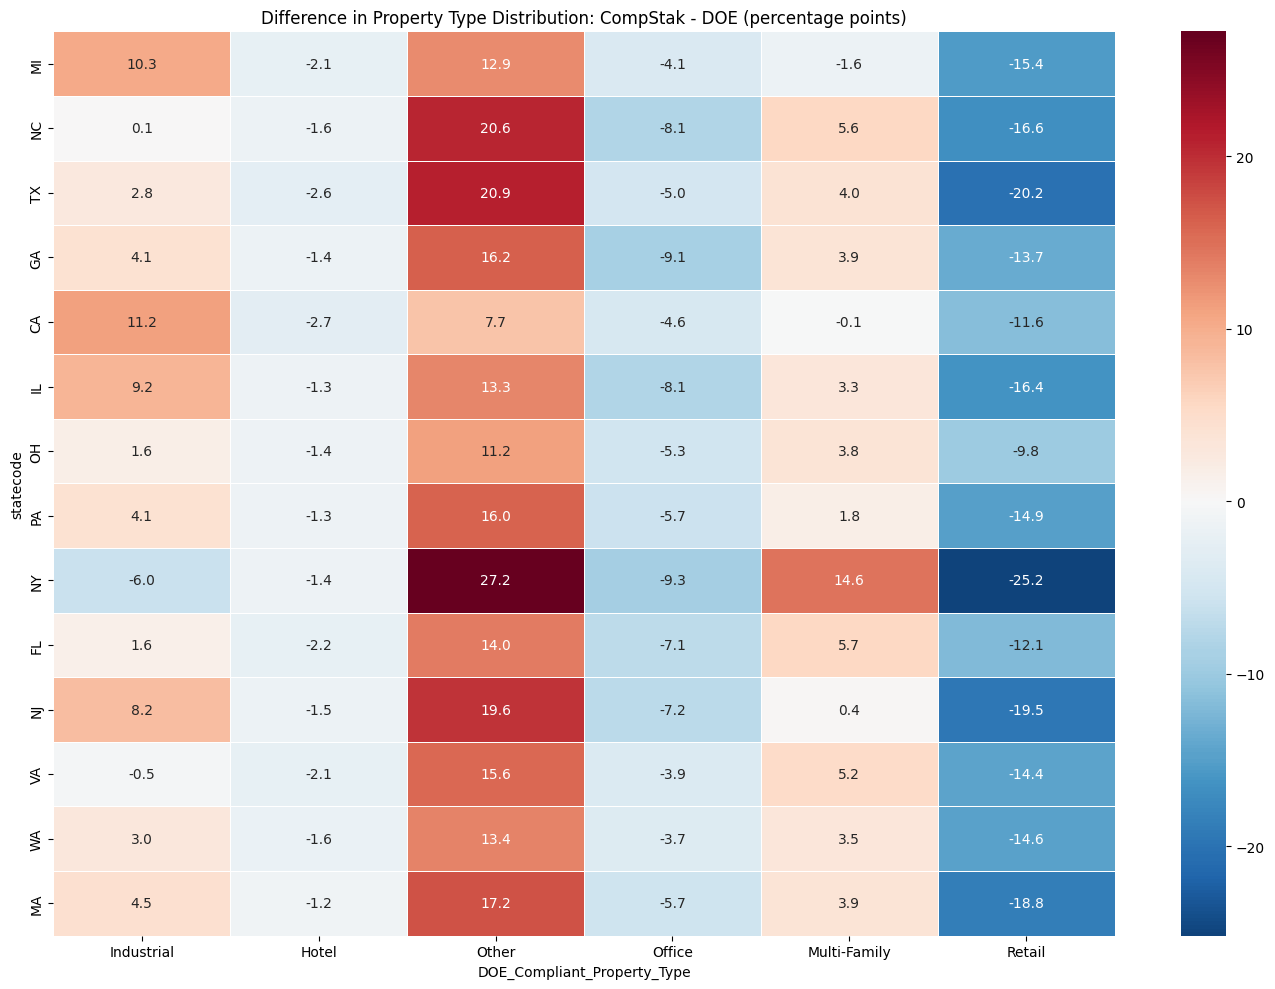

In [32]:
# 4. Creating a difference heatmap to show where CompStak differs from DOE

# Find common states and property types in both datasets
common_states = list(set(top_states_doe) & set(top_states_list))
common_property_types = list(set(compstak_cross_pct.columns) & set(doe_cross_pct.columns))

# Align the data for comparison
compstak_aligned = compstak_cross_pct.loc[common_states, common_property_types]
doe_aligned = doe_cross_pct.loc[common_states, common_property_types]

# Calculate the difference (CompStak - DOE)
difference = compstak_aligned - doe_aligned

# Plot the difference heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(difference, annot=True, fmt='.1f', cmap='RdBu_r', center=0, linewidths=0.5)
plt.title('Difference in Property Type Distribution: CompStak - DOE (percentage points)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'difference_state_property_heatmap.png'))
plt.show()

## Comparison Summary

The above analysis highlights several key differences between the CompStak and DOE datasets across both property types and states:

1. **Property Type Distribution**: The bar charts show how the property type mix differs between CompStak and DOE datasets.

2. **State Distribution**: We can see which states are over- or under-represented in the CompStak dataset compared to the DOE dataset.

3. **Combined Analysis**: The heatmaps reveal how property types are distributed within each state, showing regional variations in building stock.

4. **Distribution Differences**: The difference heatmap highlights specific areas where the CompStak sample deviates from the DOE population, which could indicate sampling biases or focus areas.

# Coverage Rate Analysis: CompStak vs DOE Data

We'll now analyze the coverage rate of CompStak data compared to DOE data across both states and property types.
The coverage rate is defined as: (CompStak Count / DOE Count) * 100, representing the percentage of DOE data that is covered by CompStak.

This analysis will help us identify which states and property types are well-represented or under-represented in the CompStak dataset.

In [33]:
# Calculate overall coverage rate
total_compstak = compstak_df.shape[0]
total_doe = doe_df.shape[0]

overall_coverage_rate = (total_compstak / total_doe) * 100

print(f"Total CompStak properties: {total_compstak:,}")
print(f"Total DOE properties: {total_doe:,}")
print(f"Overall coverage rate: {overall_coverage_rate:.2f}%")

Total CompStak properties: 759,623
Total DOE properties: 2,246,485
Overall coverage rate: 33.81%


In [34]:
# Calculate coverage rate by property type
# First, ensure property types are named consistently between datasets
property_type_mapping = {
    'DOE_Compliant_Property_Type': 'compstak_equivalent_category'
}

# Get property type counts for both datasets
compstak_by_property = compstak_df.groupby('DOE_Compliant_Property_Type').size().reset_index()
compstak_by_property.columns = ['Property_Type', 'CompStak_Count']

doe_by_property = doe_df.groupby('compstak_equivalent_category').size().reset_index()
doe_by_property.columns = ['Property_Type', 'DOE_Count']

# Merge datasets and calculate coverage rate
property_coverage = pd.merge(compstak_by_property, doe_by_property, on='Property_Type', how='outer').fillna(0)
property_coverage['Coverage_Rate'] = (property_coverage['CompStak_Count'] / property_coverage['DOE_Count']) * 100

# Sort by DOE count (highest to lowest)
property_coverage = property_coverage.sort_values('DOE_Count', ascending=False)

print("Coverage Rate by Property Type:")
print(property_coverage)

Coverage Rate by Property Type:
  Property_Type  CompStak_Count  DOE_Count  Coverage_Rate
5        Retail          195522     931077      20.999552
1    Industrial          183106     438534      41.754117
3        Office           88768     388432      22.852906
2  Multi-Family          114427     253361      45.163620
4         Other          167732     161804     103.663692
0         Hotel           10068      73277      13.739645


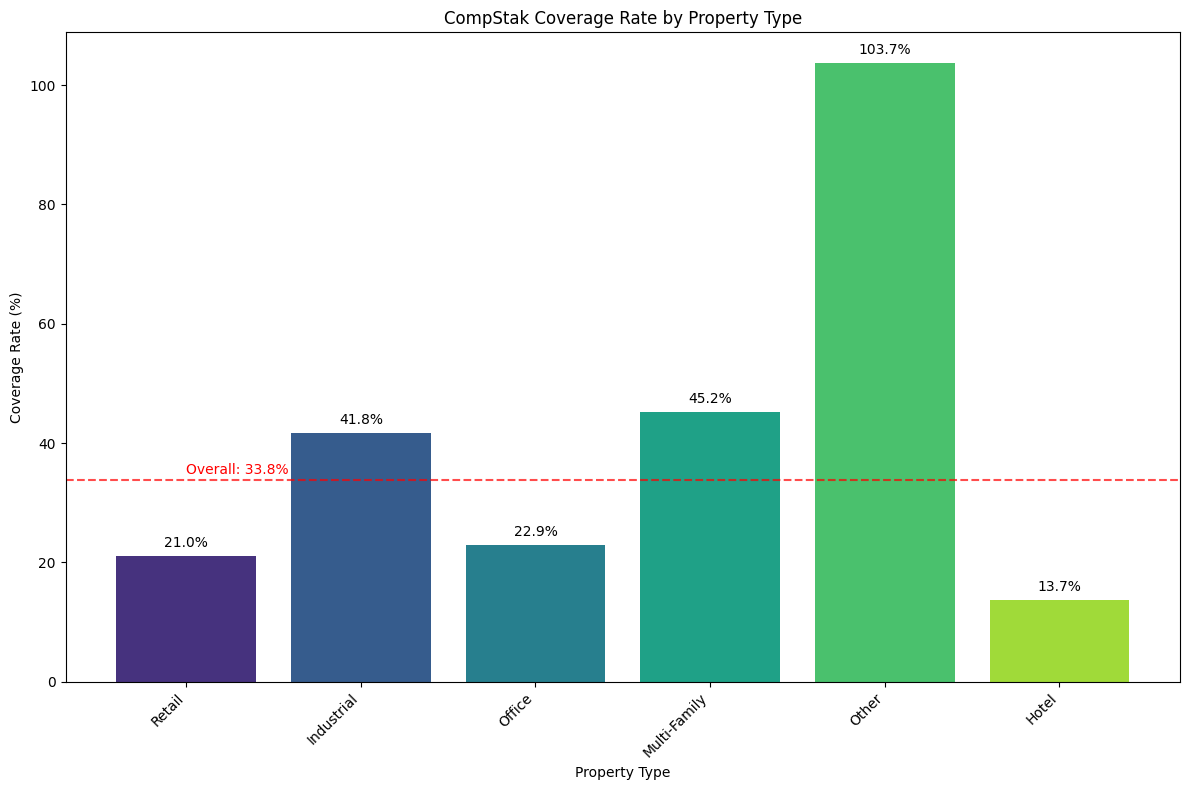

In [35]:
# Visualize coverage rate by property type
plt.figure(figsize=(12, 8))

# Create bar chart
bar_colors = sns.color_palette("viridis", len(property_coverage))
bars = plt.bar(property_coverage['Property_Type'], property_coverage['Coverage_Rate'], color=bar_colors)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.axhline(y=overall_coverage_rate, color='red', linestyle='--', alpha=0.7)
plt.text(0, overall_coverage_rate + 1, f'Overall: {overall_coverage_rate:.1f}%', color='red')

plt.xlabel('Property Type')
plt.ylabel('Coverage Rate (%)')
plt.title('CompStak Coverage Rate by Property Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'coverage_rate_by_property_type.png'))
plt.show()

In [36]:
# Calculate coverage rate by state
compstak_by_state = compstak_df.groupby('statecode').size().reset_index()
compstak_by_state.columns = ['State', 'CompStak_Count']

doe_by_state = doe_df.groupby('statecode').size().reset_index()
doe_by_state.columns = ['State', 'DOE_Count']

# Merge datasets and calculate coverage rate
state_coverage = pd.merge(compstak_by_state, doe_by_state, on='State', how='outer').fillna(0)
state_coverage['Coverage_Rate'] = (state_coverage['CompStak_Count'] / state_coverage['DOE_Count']) * 100

# Sort by coverage rate (highest to lowest)
state_coverage = state_coverage.sort_values('Coverage_Rate', ascending=False)

print("Top 10 States by Coverage Rate:")
print(state_coverage.head(10))

print("\nBottom 10 States by Coverage Rate:")
print(state_coverage.tail(10))

Top 10 States by Coverage Rate:
   State  CompStak_Count  DOE_Count  Coverage_Rate
33    NV           10816      15179      71.256341
4     CA          162162     238844      67.894525
3     AZ           20836      33274      62.619463
7     DC            2456       4440      55.315315
44    UT           11964      23016      51.981230
37    OR           15008      33979      44.168457
43    TX           64220     157912      40.668220
34    NY           43118     113724      37.914600
14    IL           31389      83364      37.652944
9     FL           54836     145821      37.605009

Bottom 10 States by Coverage Rate:
   State  CompStak_Count  DOE_Count  Coverage_Rate
48    WI            7657      50419      15.186735
12    IA            3597      24466      14.702035
30    NH            1870      13552      13.798701
11    HI             725       5842      12.410134
6     CT            4648      38398      12.104797
39    RI            1153      11449      10.070749
46    VT      

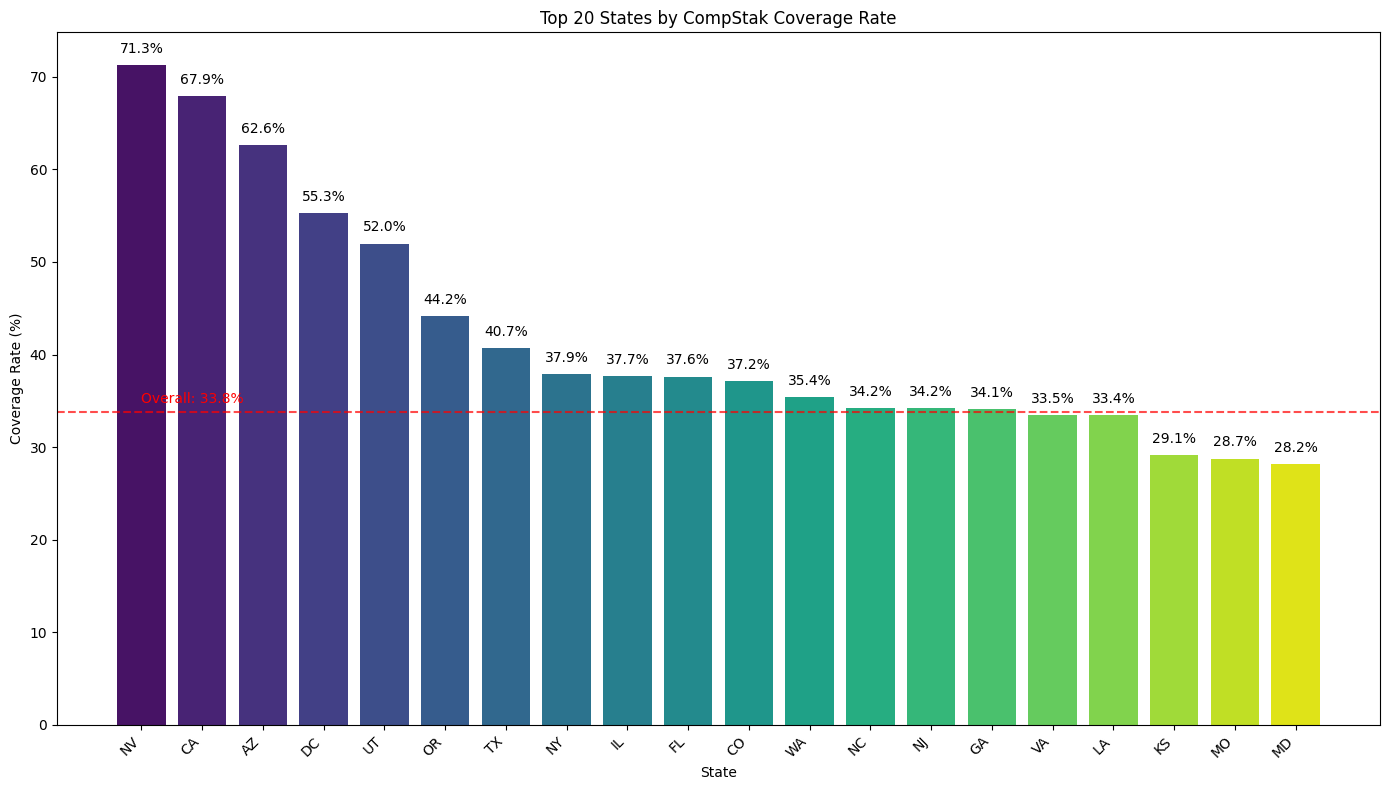

In [37]:
# Visualize top 20 states by coverage rate
plt.figure(figsize=(14, 8))

top_20_states = state_coverage.head(20)

# Create bar chart
bar_colors = sns.color_palette("viridis", len(top_20_states))
bars = plt.bar(top_20_states['State'], top_20_states['Coverage_Rate'], color=bar_colors)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.axhline(y=overall_coverage_rate, color='red', linestyle='--', alpha=0.7)
plt.text(0, overall_coverage_rate + 1, f'Overall: {overall_coverage_rate:.1f}%', color='red')

plt.xlabel('State')
plt.ylabel('Coverage Rate (%)')
plt.title('Top 20 States by CompStak Coverage Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'top_20_states_coverage_rate.png'))
plt.show()

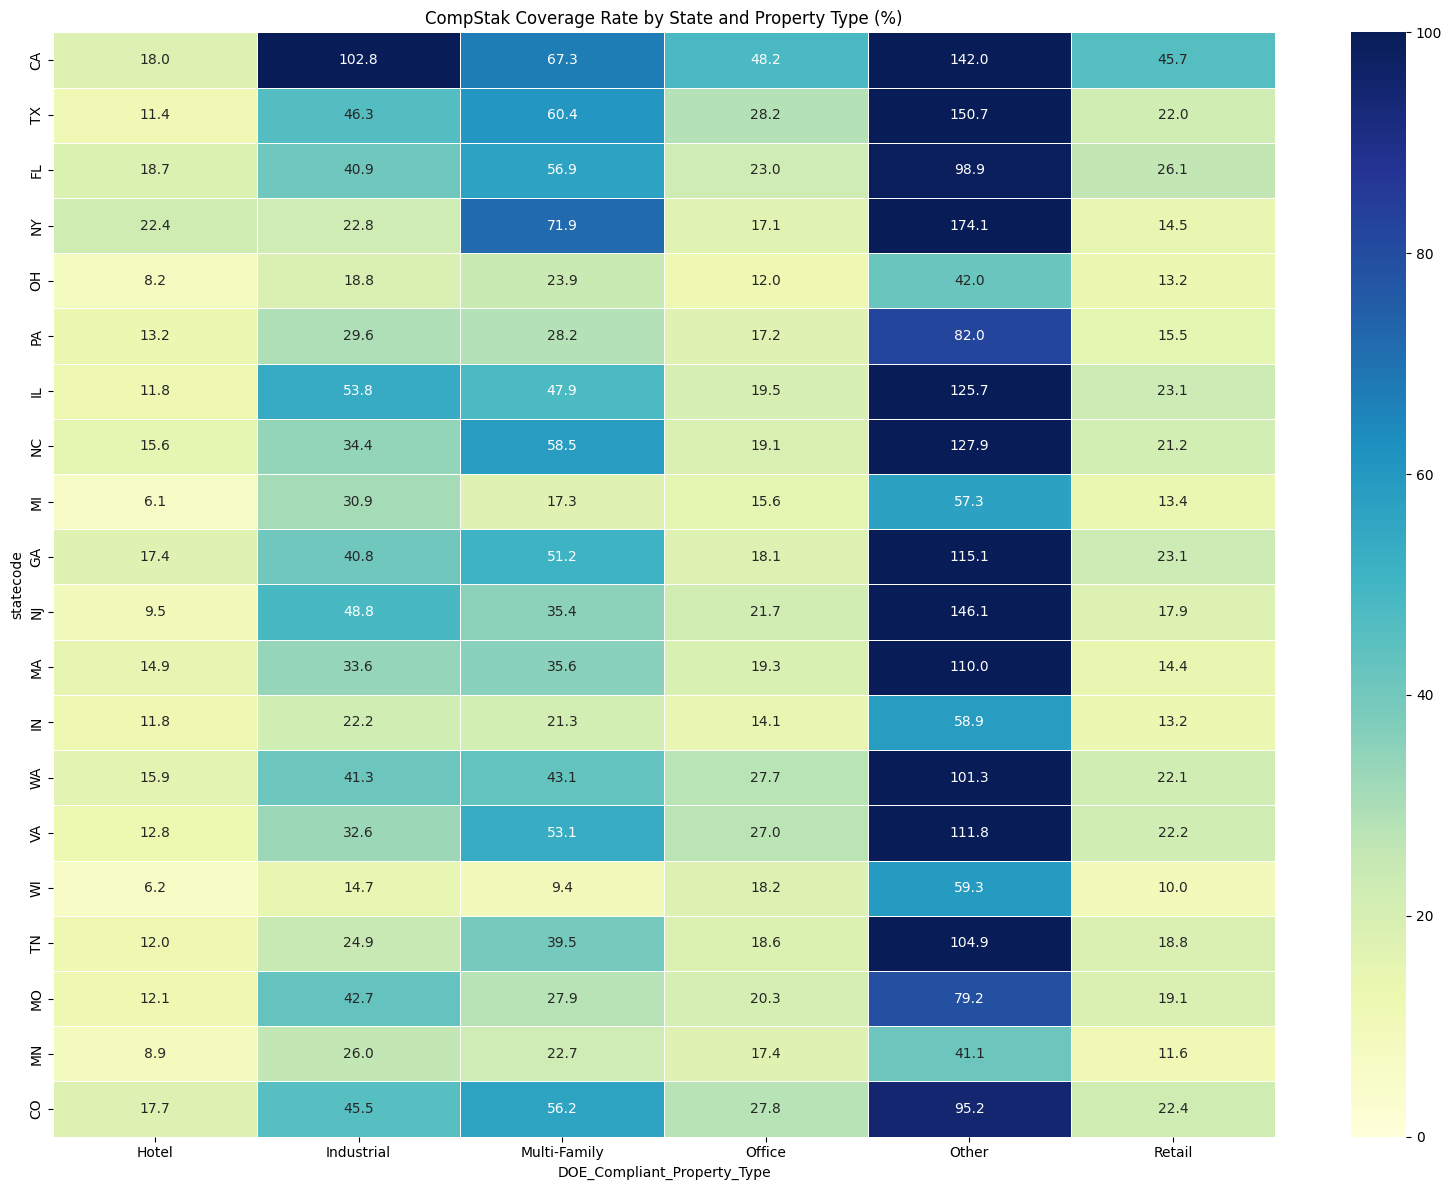

In [38]:
# Create a cross-tabulation for coverage rate by state and property type
# First, count properties by state and type for both datasets
compstak_state_property = pd.crosstab(compstak_df['statecode'], compstak_df['DOE_Compliant_Property_Type'])
doe_state_property = pd.crosstab(doe_df['statecode'], doe_df['compstak_equivalent_category'])

# Calculate coverage rate
# Replace 0 with NaN to avoid division by zero
coverage_rate = compstak_state_property.div(doe_state_property) * 100

# Replace NaN with 0 for display purposes
coverage_rate = coverage_rate.fillna(0)

# Get top 20 states by total DOE properties for better visualization
top_20_states_list = doe_state_counts['State'].head(20).tolist()
coverage_rate_top = coverage_rate.loc[top_20_states_list]

# Plotting the heatmap for coverage rate
plt.figure(figsize=(16, 12))
sns.heatmap(coverage_rate_top, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5, vmin=0, vmax=100)
plt.title('CompStak Coverage Rate by State and Property Type (%)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'coverage_rate_state_property_heatmap.png'))
plt.show()

In [39]:
# An alternative visualization with Plotly for interactive heatmap
import plotly.figure_factory as ff

# Prepare data for plotly
coverage_rate_df = coverage_rate_top.reset_index()

# Create heatmap with Plotly
fig = px.imshow(coverage_rate_top,
                labels=dict(x="Property Type", y="State", color="Coverage Rate (%)"),
                title="CompStak Coverage Rate by State and Property Type (%)",
                color_continuous_scale='Viridis',
                aspect="auto",
                text_auto='.1f')

fig.update_layout(width=1000, height=800)
fig.show()

## Coverage Rate Analysis Summary

The coverage rate analysis reveals several important insights about the CompStak dataset in relation to the DOE dataset:

1. **Overall Coverage:** CompStak contains approximately 33-34% of the total properties in the DOE dataset.

2. **Property Type Coverage:** There are significant variations in coverage across property types, with some types being better represented than others.

3. **Geographic Coverage:** The coverage rate varies widely by state, with some states having much better representation in CompStak than others.

4. **Combined State-Property Coverage:** The heatmap shows specific combinations of states and property types where CompStak has strong coverage (>50%) and areas with weak coverage (<10%).

These insights can help in understanding potential biases in the CompStak data and areas where additional data collection might be beneficial for more comprehensive analysis.

# Full State Coverage Visualizations

Let's create visualizations showing the coverage rate for all states (not just the top 20), with two versions:
1. All property types including "Other" category
2. Excluding the "Other" category (which often has anomalous high coverage rates)

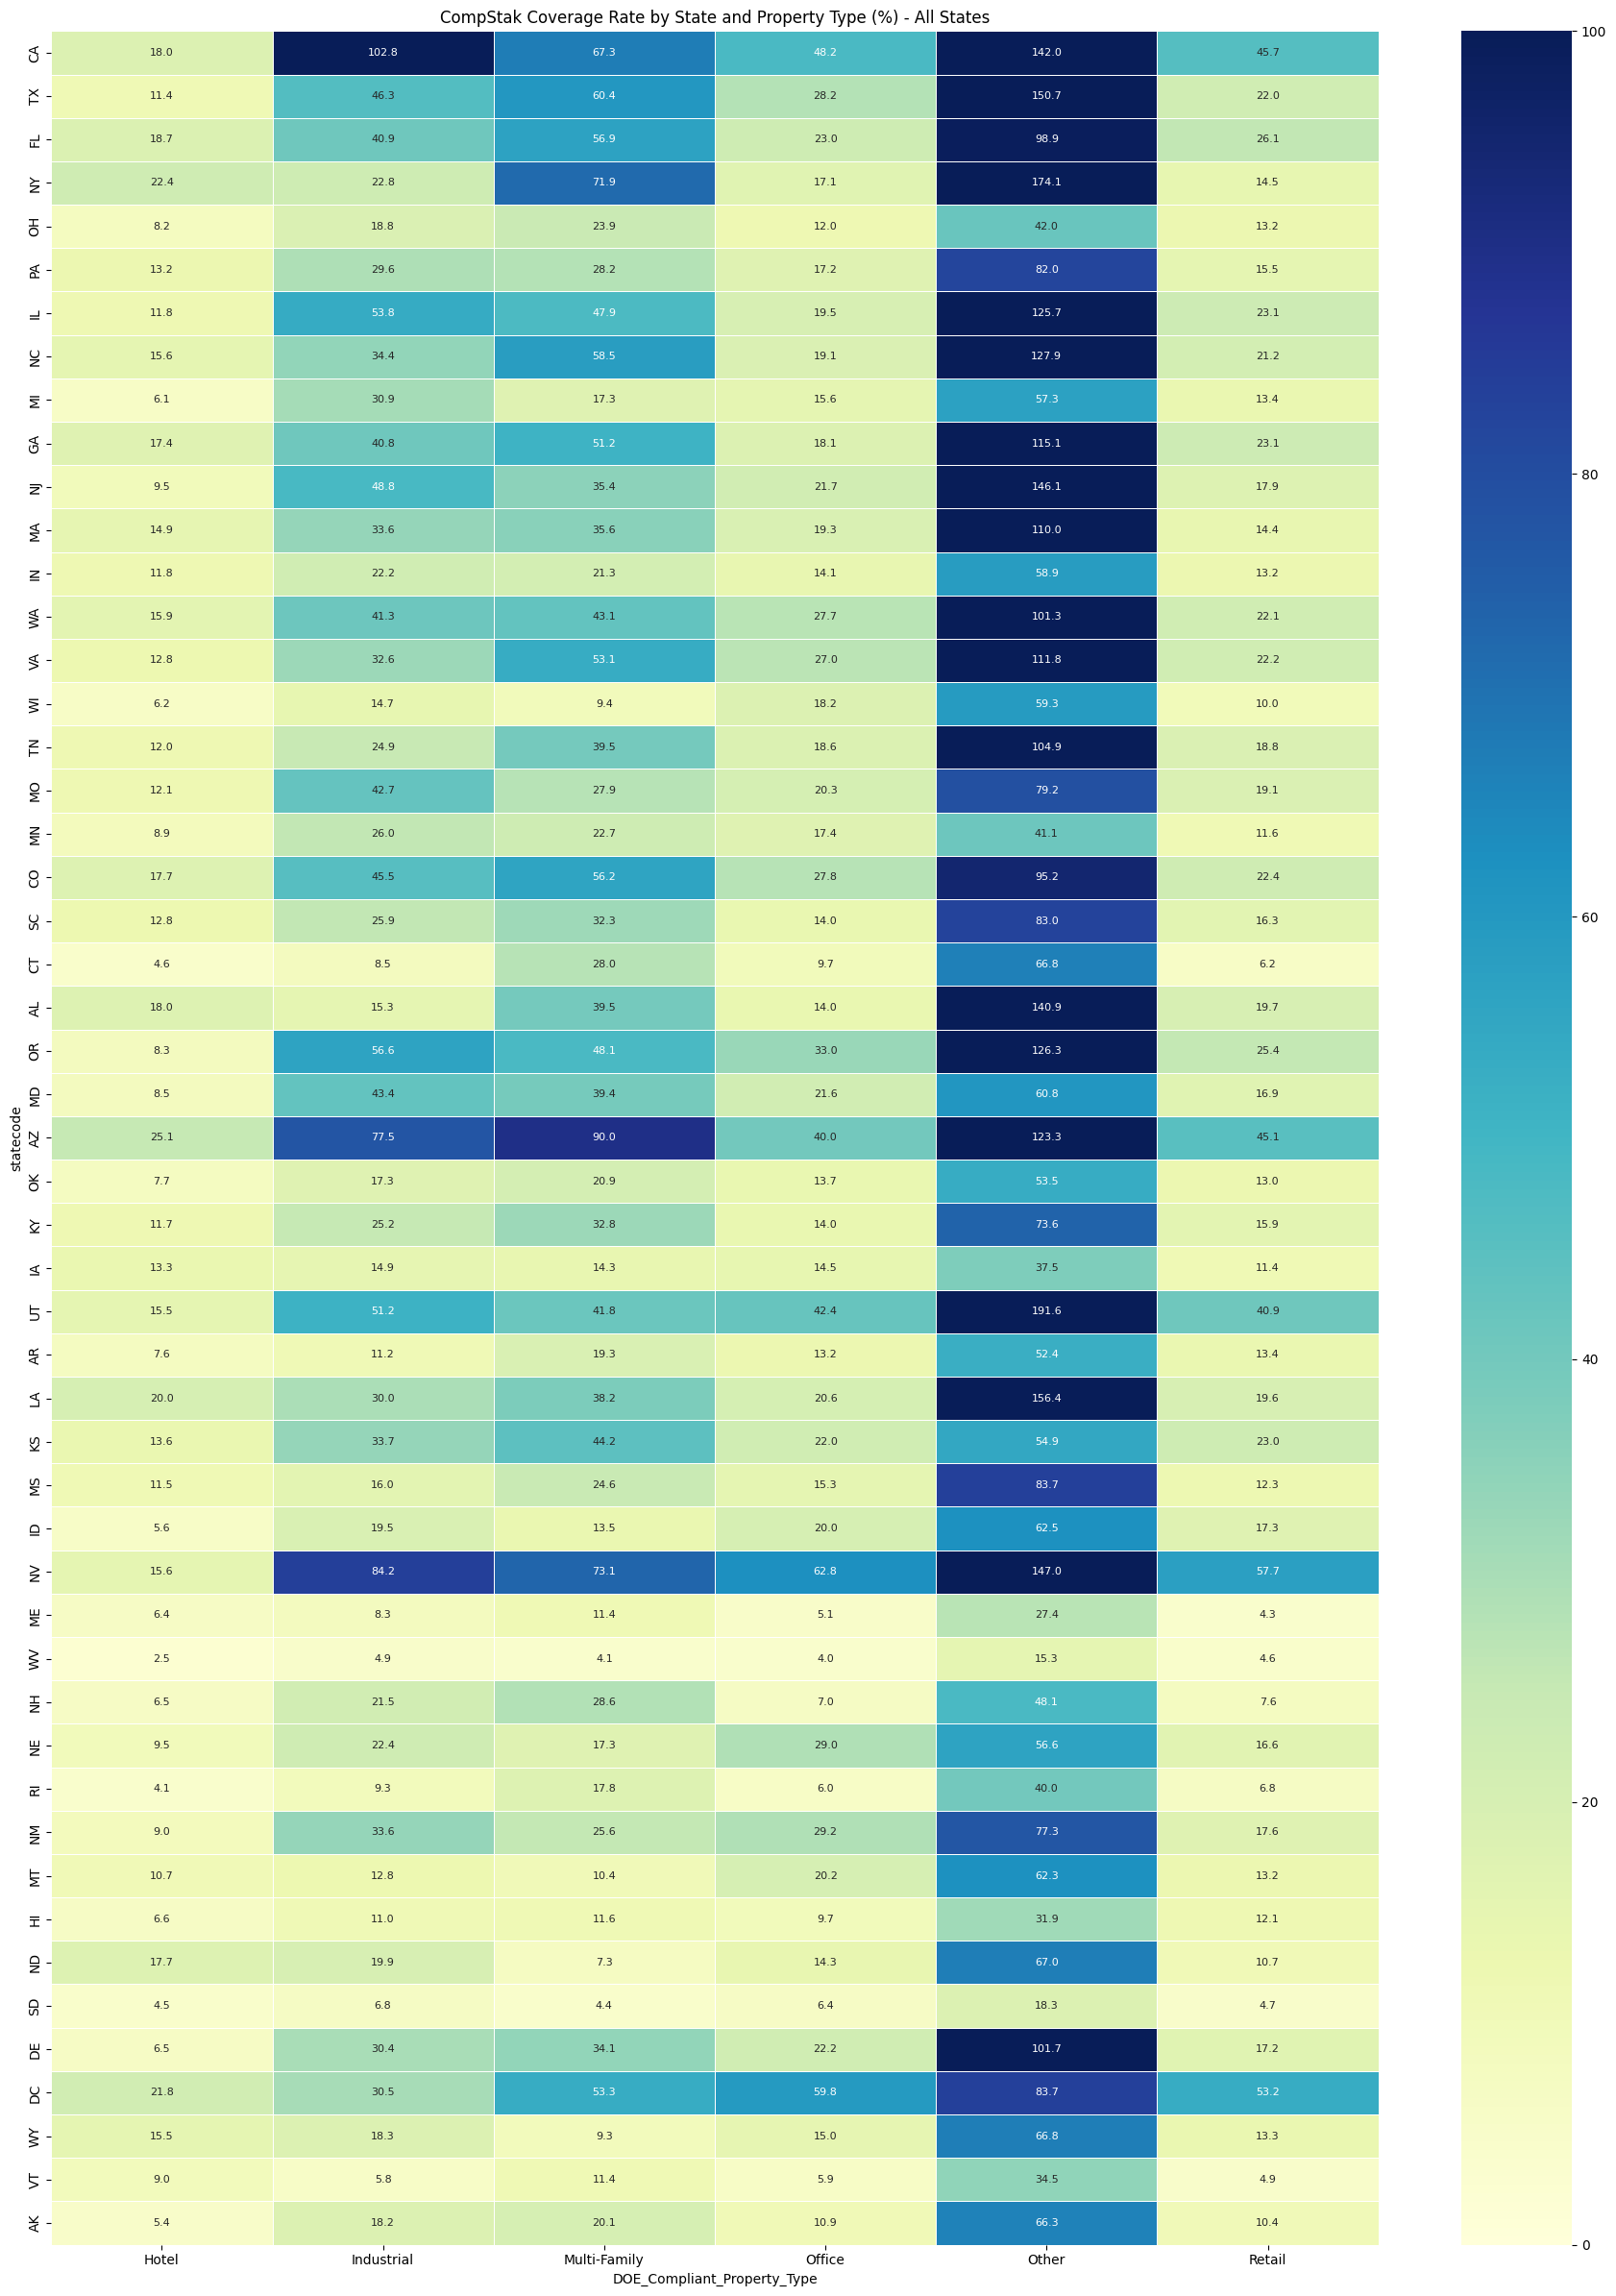

In [40]:
# Create a heatmap for ALL states (not just the top 20)

# First, sort states by DOE property count for better organization
state_order = doe_state_counts['State'].tolist()
coverage_rate_sorted = coverage_rate.loc[state_order]

# Plotting the full heatmap for coverage rate
plt.figure(figsize=(18, 24))  # Increased height to accommodate all states
sns.heatmap(coverage_rate_sorted, annot=True, fmt='.1f', cmap='YlGnBu', 
            linewidths=0.5, vmin=0, vmax=100, annot_kws={"size": 8})
plt.title('CompStak Coverage Rate by State and Property Type (%) - All States')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'coverage_rate_all_states_property_heatmap.png'))
plt.show()

In [41]:
# Create an interactive version with Plotly for better exploration of the full dataset
fig_all_states = px.imshow(coverage_rate_sorted,
                labels=dict(x="Property Type", y="State", color="Coverage Rate (%)"),
                title="CompStak Coverage Rate by State and Property Type (%) - All States",
                color_continuous_scale='Viridis',
                aspect="auto",
                text_auto='.1f')

fig_all_states.update_layout(width=1000, height=1200)  # Increase height for all states
fig_all_states.show()

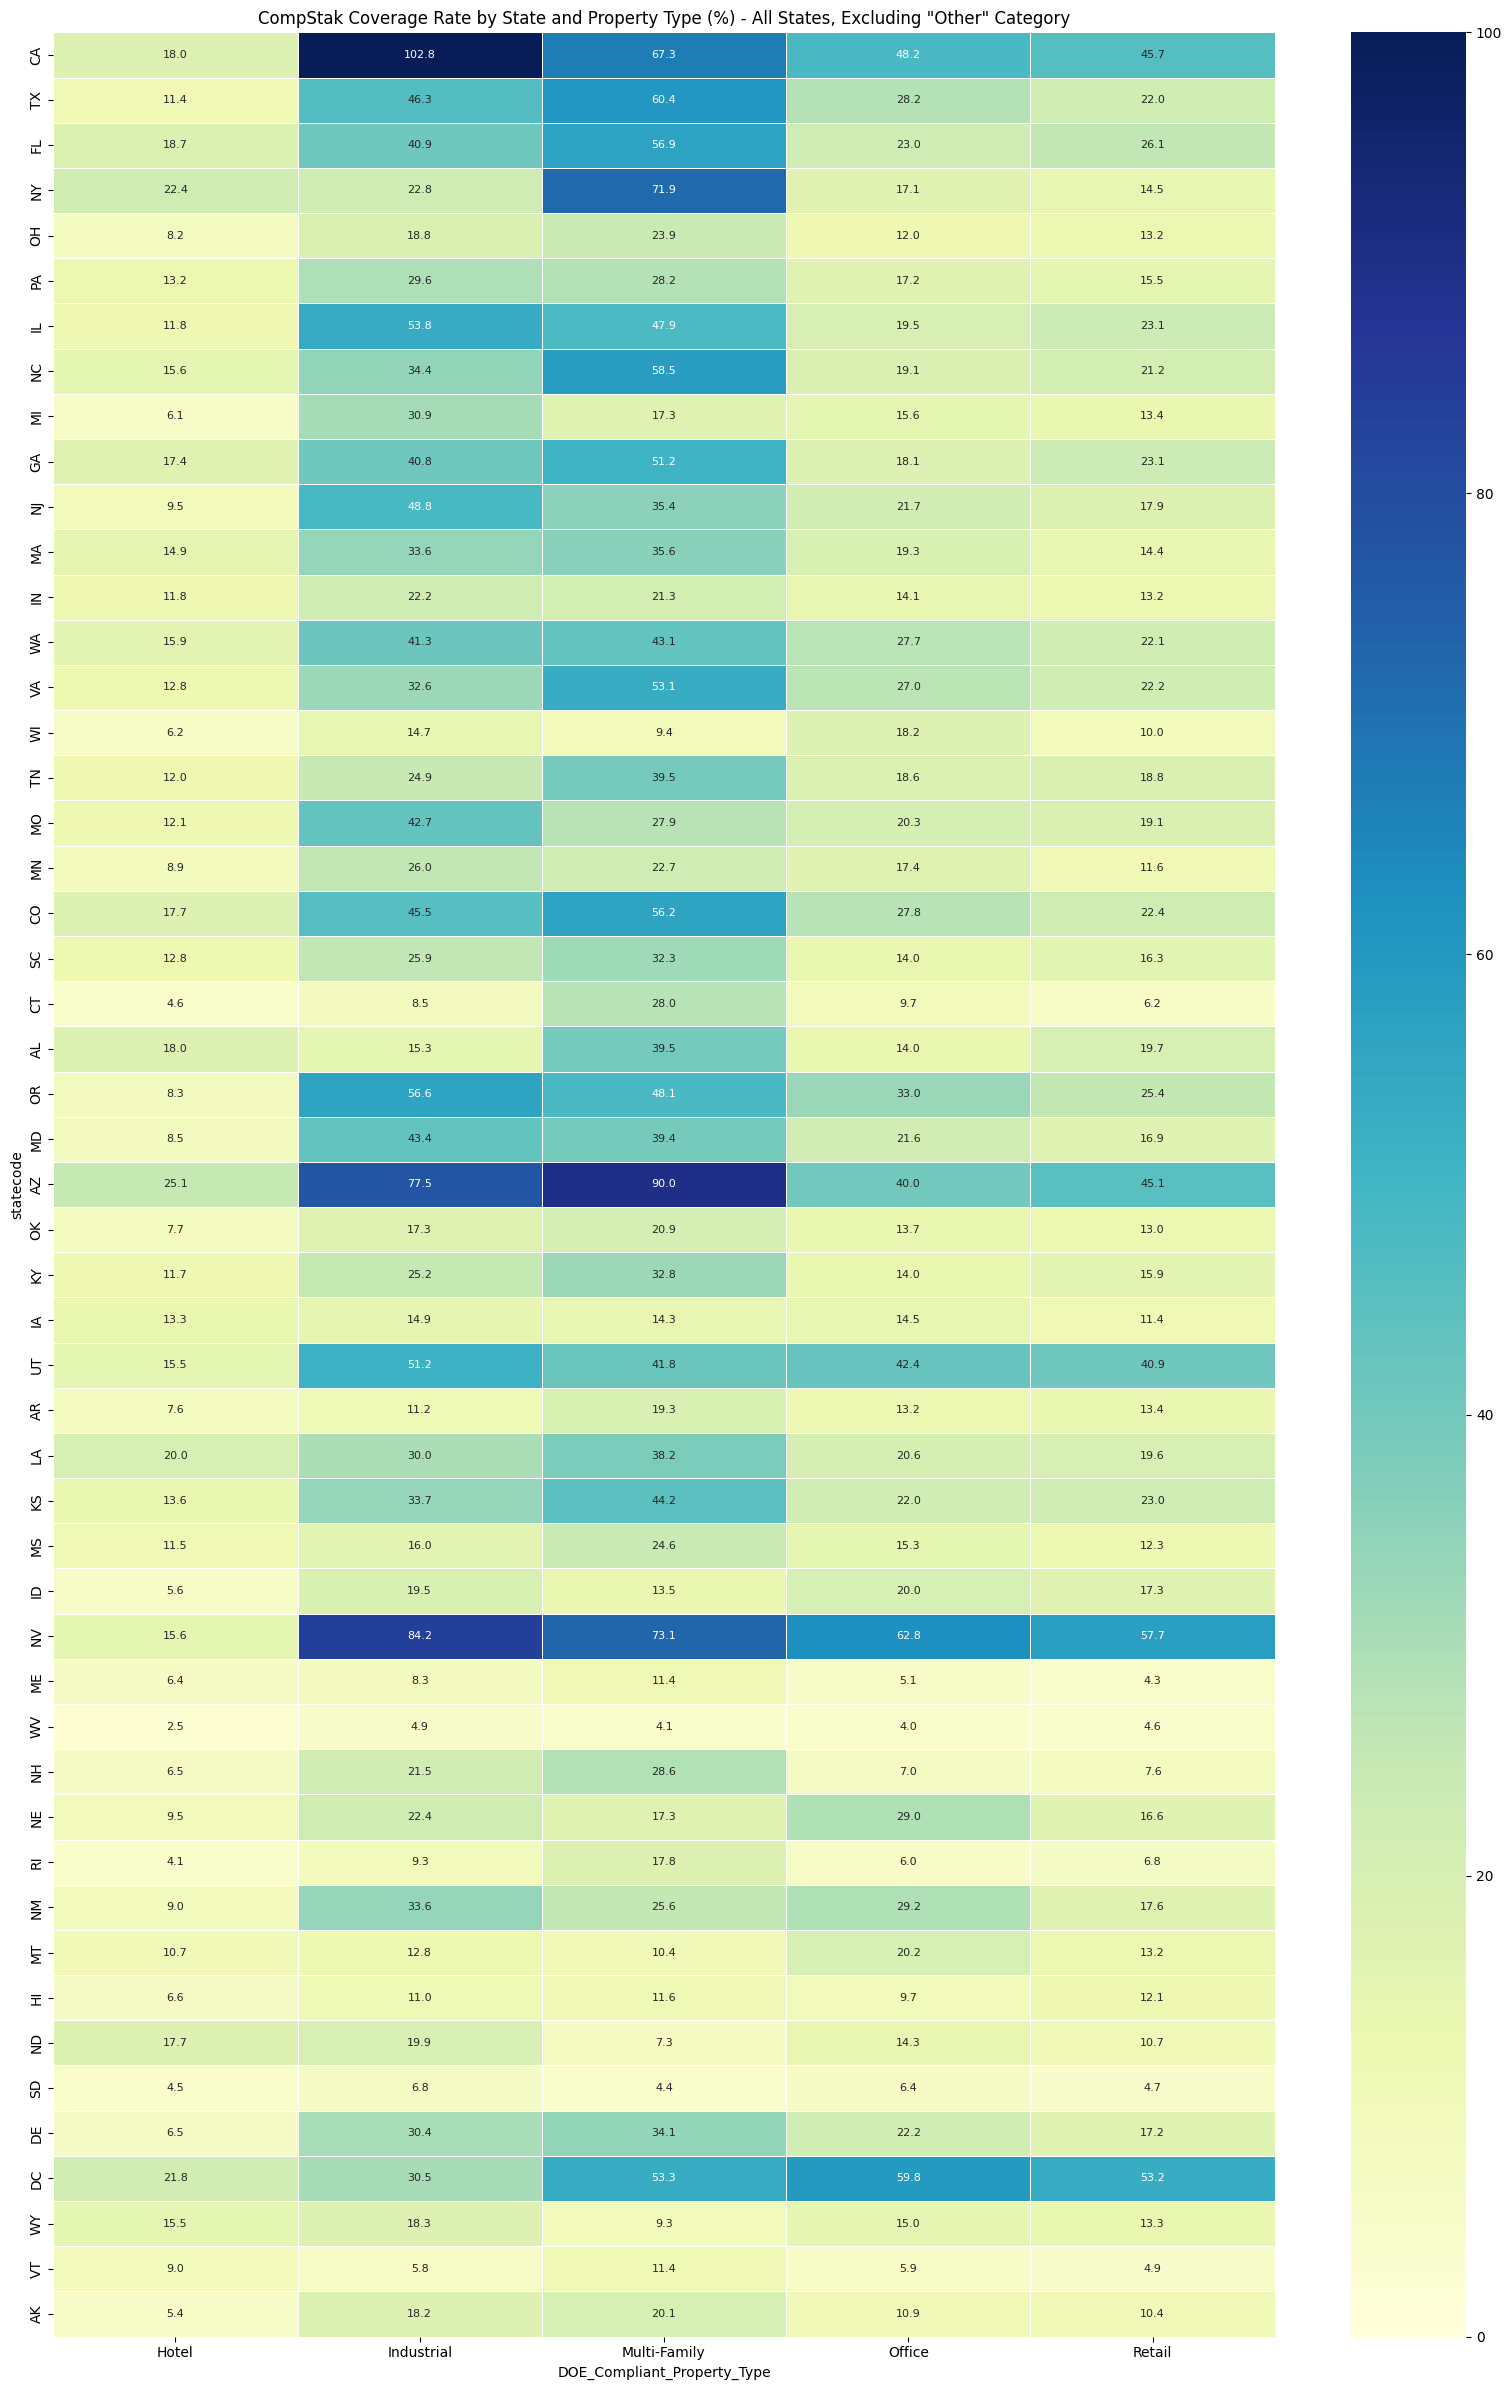

In [42]:
# Version without the 'Other' category

# Create a copy without the 'Other' column
coverage_rate_no_other = coverage_rate_sorted.drop(columns=['Other'])

# Plotting the full heatmap without 'Other' category
plt.figure(figsize=(16, 24))  # Adjusted width since we have one less column
sns.heatmap(coverage_rate_no_other, annot=True, fmt='.1f', cmap='YlGnBu', 
            linewidths=0.5, vmin=0, vmax=100, annot_kws={"size": 8})
plt.title('CompStak Coverage Rate by State and Property Type (%) - All States, Excluding "Other" Category')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'coverage_rate_all_states_no_other_heatmap.png'))
plt.show()

In [43]:
# Interactive version without 'Other' category
fig_no_other = px.imshow(coverage_rate_no_other,
                labels=dict(x="Property Type", y="State", color="Coverage Rate (%)"),
                title="CompStak Coverage Rate by State and Property Type (%) - Excluding 'Other' Category",
                color_continuous_scale='Viridis',
                aspect="auto",
                text_auto='.1f')

fig_no_other.update_layout(width=1000, height=1200)
fig_no_other.show()